In [1]:
import pandas as pd
import numpy as np 
import os
from sklearn import model_selection
import string
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# First we will import the data in our python file using os module

### now first we will se what type of folders/classes/20_newsgroups we have , which is going to be our output (we will us listdir for obtaining the list)

If the folders are not in current path as mentioned , just change it in my_path just once with initial address of all 20_newsgroups address and rest all will be handled 

In [2]:
my_path='twenty+newsgroups/20_newsgroups' ## this is the path of the data which i will be accessing
folders=os.listdir(my_path)

In [3]:
folders ##.DS_Store is the hidden file , so let's remove it and let's sort the array

['talk.politics.mideast',
 '.DS_Store',
 'rec.autos',
 'comp.sys.mac.hardware',
 'alt.atheism',
 'rec.sport.baseball',
 'comp.os.ms-windows.misc',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.med',
 'talk.politics.misc',
 'rec.motorcycles',
 'comp.windows.x',
 'comp.graphics',
 'comp.sys.ibm.pc.hardware',
 'sci.electronics',
 'talk.politics.guns',
 'sci.space',
 'soc.religion.christian',
 'misc.forsale',
 'talk.religion.misc']

In [4]:
folders.pop(1)
folders=sorted(folders)
folders[0]

'alt.atheism'

In [5]:
len(folders)

20

In [6]:
## as we have got all of our folders , now in each folder there are 1000 files which has texts written in it so now lets get that data
x=[]## will store the document without any reference to its file name because we just need the features right now
y=[]## for each document we will have its output/newsgroup stored here 
for newsgroup in folders:
    for document in sorted(os.listdir(os.path.join(my_path,newsgroup))):## this will help us in getting each document from the particular newsgroup 
        with open(os.path.join(my_path,newsgroup,document),'r',encoding='latin-1') as txt:
            x.append((txt.read()))
            y.append(newsgroup)


In [7]:
print(len(x))
print(len(y))

19997
19997


In [8]:
x[0]

'Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49960 alt.atheism.moderated:713 news.answers:7054 alt.answers:126\nPath: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!magnus.acs.ohio-state.edu!usenet.ins.cwru.edu!agate!spool.mu.edu!uunet!pipex!ibmpcug!mantis!mathew\nFrom: mathew <mathew@mantis.co.uk>\nNewsgroups: alt.atheism,alt.atheism.moderated,news.answers,alt.answers\nSubject: Alt.Atheism FAQ: Atheist Resources\nSummary: Books, addresses, music -- anything related to atheism\nKeywords: FAQ, atheism, books, music, fiction, addresses, contacts\nMessage-ID: <19930329115719@mantis.co.uk>\nDate: Mon, 29 Mar 1993 11:57:19 GMT\nExpires: Thu, 29 Apr 1993 11:57:19 GMT\nFollowup-To: alt.atheism\nDistribution: world\nOrganization: Mantis Consultants, Cambridge. UK.\nApproved: news-answers-request@mit.edu\nSupersedes: <19930301143317@mantis.co.uk>\nLines: 290\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-m

In [9]:
## train test split
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,random_state=0)

In [10]:
## stop words - common words in english which will not affect our predictions , so will not include them in predictions
stopwords = ['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone',
             'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount',
             'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around',
             'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before',
             'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both',
             'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de',
             'describe', 'detail', 'did', 'do', 'does', 'doing', 'don', 'done', 'down', 'due', 'during', 'each', 'eg',
             'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone',
             'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for',
             'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had',
             'has', 'hasnt', 'have', 'having', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed',
             'interest', 'into', 'is', 'it', 'its', 'itself', 'just', 'keep', 'last', 'latter', 'latterly', 'least', 'less',
             'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly',
             'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine',
             'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once',
             'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own',
             'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 's', 'same', 'see', 'seem', 'seemed', 'seeming',
             'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 
             'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system',
             't', 'take', 'ten', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there',
             'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thickv', 'thin', 'third', 'this',
             'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward',
             'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we',
             'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby',
             'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
             'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself',
             'yourselves']

In [11]:
len(stopwords)

327

In [12]:
## building a vocabulary of words with their frequency from all the documents we have
vocab={}
for i in range(len(x_train)):
    for word in x_train[i].split():## split for converting the doxument into list of words , by default seperator is space
        new_word=word.strip(string.punctuation).lower()## now as we aplitted if space was there but punctuation might have got attached so to remove that we did strip
        if(len(new_word)>2)  and (new_word not in stopwords):
            if(new_word in vocab):
                vocab[new_word]+=1
            else:
                vocab[new_word]=1
        

In [13]:
len(vocab)

223273

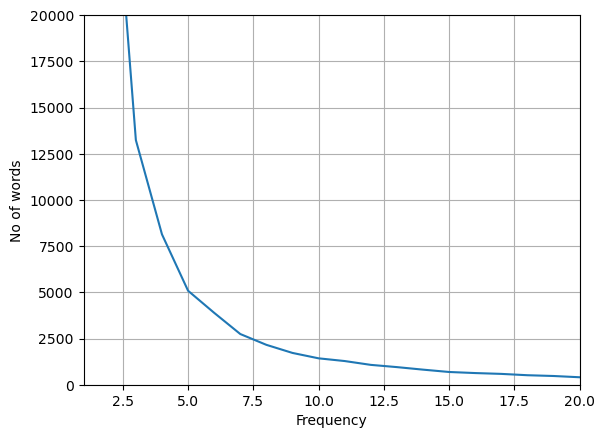

In [14]:
## now we will see how many are there of a particular frequency and how many we will need
no_of_words=[0 for i in range(max(vocab.values())+1)]
freq=[i for i in range(max(vocab.values())+1)]
for i in vocab:
    no_of_words[vocab[i]]+=1
plt.plot(freq,no_of_words)
plt.axis([1, 20, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
plt.grid()
plt.show()

In [15]:
## now we can observe that there a lot of words with very less frequency , so let's not consider them and consider the words which have a frequency greaater than a certain values
sort_dict=sorted(vocab.items(),key=lambda x : x[1],reverse=True)## now let us take top 5000 values after sorting ## lambda here is an anonymous function
final_dict={}
for key,value in sort_dict[0:5001]:
    final_dict[key]=value

In [16]:
final_dict ## now in this dictionary we have all the words we will be considering as our features

{'subject': 16224,
 'lines': 15659,
 'date': 15558,
 'newsgroups': 15278,
 'path': 15246,
 'message-id': 15051,
 'apr': 14784,
 'organization': 14770,
 'gmt': 13305,
 '1993': 11104,
 'writes': 10997,
 'references': 9745,
 'article': 9419,
 'sender': 8179,
 'people': 7548,
 "don't": 7534,
 'like': 7507,
 'university': 7416,
 'know': 6667,
 'nntp-posting-host': 6431,
 'think': 5873,
 'use': 5126,
 'time': 5010,
 "it's": 4943,
 "i'm": 4900,
 'new': 4839,
 'good': 4669,
 'xref': 4566,
 'cantaloupe.srv.cs.cmu.edu': 4558,
 'say': 3904,
 'make': 3858,
 'way': 3831,
 'news': 3694,
 'distribution': 3592,
 'right': 3544,
 'god': 3539,
 'world': 3336,
 'want': 3305,
 'said': 3157,
 'used': 3142,
 'need': 3069,
 "max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax": 3065,
 'really': 2955,
 'work': 2946,
 'believe': 2807,
 'problem': 2761,
 'computer': 2746,
 'years': 2522,
 "i've": 2508,
 'information': 2481,
 'help': 2453,
 'going': 2439,
 'state': 2418,
 'using': 2403,
 'better': 2381,
 

In [17]:
features=[]
for k in final_dict:
    features.append(k)
word='post'
features.index(word)

133

In [18]:
## now as we have got all of our features we need our x_train_dataset- word counts in each document
x_train_dataset=np.zeros((len(x_train),len(features)))
for i in range(len(x_train)):
    word_list=[word.strip(string.punctuation).lower() for word in x_train[i].split()]
    for word in word_list:
        if(word in features):## if word not if features we will just leave it and will not do anything
               x_train_dataset[i][features.index(word)]+=1

In [19]:
x_test_dataset=np.zeros((len(x_test),len(features)))
for i in range(len(x_test)):
    word_list=[word.strip(string.punctuation).lower() for word in x_test[i].split()]
    for word in word_list:
        if(word in features):
               x_test_dataset[i][features.index(word)]+=1

In [62]:
## using sklearn multinomial naive bayes to solve it
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)

MultinomialNB()

In [21]:
y_test_pred=clf.predict(x_test_dataset)

print("Sklearn's score on training data : ",clf.score(x_train_dataset,y_train))
print("Sklearn's score on testing data : ",clf.score(x_test_dataset,y_test))
print("Classification Report of Testing Data : ")
print(classification_report(y_test,y_test_pred))

Sklearn's score on training data :  0.9123157964926318
Sklearn's score on testing data :  0.8636
Classification Report of Testing Data : 
                          precision    recall  f1-score   support

             alt.atheism       0.73      0.80      0.77       233
           comp.graphics       0.78      0.80      0.79       253
 comp.os.ms-windows.misc       0.81      0.83      0.82       249
comp.sys.ibm.pc.hardware       0.81      0.87      0.84       240
   comp.sys.mac.hardware       0.85      0.93      0.88       236
          comp.windows.x       0.93      0.84      0.88       240
            misc.forsale       0.82      0.86      0.84       261
               rec.autos       0.91      0.92      0.91       269
         rec.motorcycles       0.90      0.96      0.93       284
      rec.sport.baseball       0.99      0.97      0.98       248
        rec.sport.hockey       0.97      0.99      0.98       231
               sci.crypt       0.95      0.91      0.93       233
   

In [22]:
## implementing multinomial naive bayes from scratch

In [23]:
def fit(x_train1,y_train2):## this function will help us create a dictionary with various levels to predict easily
    x_train=np.array(x_train1)
    y_train=np.array(y_train2)
    count={}
    classes=set(y_train)
    for current_class in classes:
        count[current_class]={}## 1st level with all the keys as classes
        X=x_train[y_train==current_class]## all rows with y==current_class
        Y=y_train[y_train==current_class]
        feat=x_train.shape[1]## number of features
        count[current_class]["total_points"]=len(Y)## total points of current_class in our training data
        count[current_class]["total_words"]=X.sum()## total words in a particular class
        total_words=0
        for i in range(feat):
            count[current_class][i]=X[:,i].sum()## 2nd level with keys as feature index and storing count of the word in the current_class
            total_words+=X[:,i].sum()
    count["total_data_points"]=len(y_train)## total points in our training dataset
    return count

In [96]:
def probability(count,x,c_c):## this will help us calculate the logarithmic probability 
    output=np.log(count[c_c]["total_points"])-np.log(count["total_data_points"])## int this we will be adding our answer
    n_o_f=len(count[c_c].keys())-2## because we have 2 extra keys of total words and total points
    for i in range(n_o_f):
        if x[i]!=0:## this we have put , that if a word is not there in document , we will not multiply its prob, otherwise if we do then in every we will be simply multiplying the probabilities of all the 5001 words and we will get same answer, so for ecah testing data as we have the the frequency of the words which are our features and in the document as well , but for the words which are in features but not in the document for them we have frequency marked as zero but still in the testing dataset, so we will just check if count of word for that document is zero we will not include it.
            current_word_count=count[c_c][i]+1## how many words of type i are there in current class c_c
            total_word_count=count[c_c]["total_words"]+n_o_f## total words present in our current_class c_c
            current_word_prob=(np.log(current_word_count)-np.log(total_word_count))
            output+=(current_word_prob)
    return output 

In [25]:
def singlepointpredict(count , x):## in this function we will simply compare P(y=a/X=x) and class with max P will be predicted
    classes=count.keys()
    best_class=-1000## we will class with best probability
    best_p=-1000## the best probability will be updated here
    first_run=True## in the first run we will obviously update our values
    for current_class in classes:
        if(current_class=="total_data_points"):## as we have one extra key for count of all the data points
            continue
        p_current_class=probability(count,x,current_class)
        if(first_run or p_current_class>best_p):## if we got higher probability we will update our answer
            best_p=p_current_class
            best_class=current_class
        first_run=False## after first run we will make it false 
    return best_class

In [26]:
def predict(count,x_test):## this function will predict the values of x_test with the help of count and singlepointpredict
    y_pred=[]
    i=0
    for x in x_test:
        y_pred.append(singlepointpredict(count,x))## we are appending the outputs of each document in our output
    return y_pred

In [27]:
def score(y_test,y_pred):## this is the mean accuracy
    count=0
    for i in range(len(y_test)):
        if(y_test[i]==y_pred[i]):
            count+=1
    return count/len(y_test)

In [97]:
count=fit(x_train_dataset,y_train)## creating the count dictionary 
count["total_data_points"]

14997

In [98]:
y_test_pred_2=predict(count,x_test_dataset)## predicting on x_test_dataset

In [32]:
print(count.keys())

dict_keys(['sci.electronics', 'comp.graphics', 'soc.religion.christian', 'rec.autos', 'comp.sys.ibm.pc.hardware', 'talk.politics.misc', 'talk.politics.guns', 'talk.politics.mideast', 'talk.religion.misc', 'comp.sys.mac.hardware', 'rec.sport.hockey', 'sci.crypt', 'comp.windows.x', 'sci.med', 'comp.os.ms-windows.misc', 'alt.atheism', 'misc.forsale', 'sci.space', 'rec.motorcycles', 'rec.sport.baseball', 'total_data_points'])


In [99]:
print("Score of testing data on our Multinomial Naive Bayes : ",score(y_test,y_test_pred_2))
print("Classification Report : ")
print(classification_report(y_test,y_test_pred_2))

Score of testing data on our Multinomial Naive Bayes :  0.873
Classification Report : 
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.84      0.80       233
           comp.graphics       0.81      0.81      0.81       253
 comp.os.ms-windows.misc       0.86      0.85      0.86       249
comp.sys.ibm.pc.hardware       0.83      0.89      0.86       240
   comp.sys.mac.hardware       0.86      0.93      0.89       236
          comp.windows.x       0.94      0.87      0.90       240
            misc.forsale       0.83      0.87      0.85       261
               rec.autos       0.89      0.92      0.91       269
         rec.motorcycles       0.92      0.99      0.95       284
      rec.sport.baseball       0.97      0.98      0.97       248
        rec.sport.hockey       0.99      0.97      0.98       231
               sci.crypt       0.94      0.91      0.93       233
         sci.electronics       0.89      0.89      0.8

In [101]:
y_train_pred=predict(count,x_train_dataset)

In [102]:
score(y_train,y_train_pred)

0.9160498766419951